In [360]:
# Import Tensorflow

import tensorflow as tf
import tensorflow_hub as hub

print("TF Version:", tf.__version__)
print("TF Hub Version:", hub.__version__)

#Check for GPU availablity
# Do we have access to a GPU?
device_list = tf.config.list_physical_devices()
if "GPU" in [device.device_type for device in device_list]:
  print(f"[INFO] TensorFlow has GPU available to use. Woohoo!! Computing will be speed up!")
  print(f"[INFO] Accessible devices:\n{device_list}")
else:
  print(f"[INFO] TensorFlow does not have GPU available to use. Models may take a while to train.")
  print(f"[INFO] Accessible devices:\n{device_list}")

TF Version: 2.10.0
TF Hub Version: 0.8.0
[INFO] TensorFlow has GPU available to use. Woohoo!! Computing will be speed up!
[INFO] Accessible devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [361]:
#Import Pandas

import pandas as pd
labels_csv = pd.read_csv("labels.csv")

print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [362]:
len(labels_csv)

10222

<Axes: xlabel='breed'>

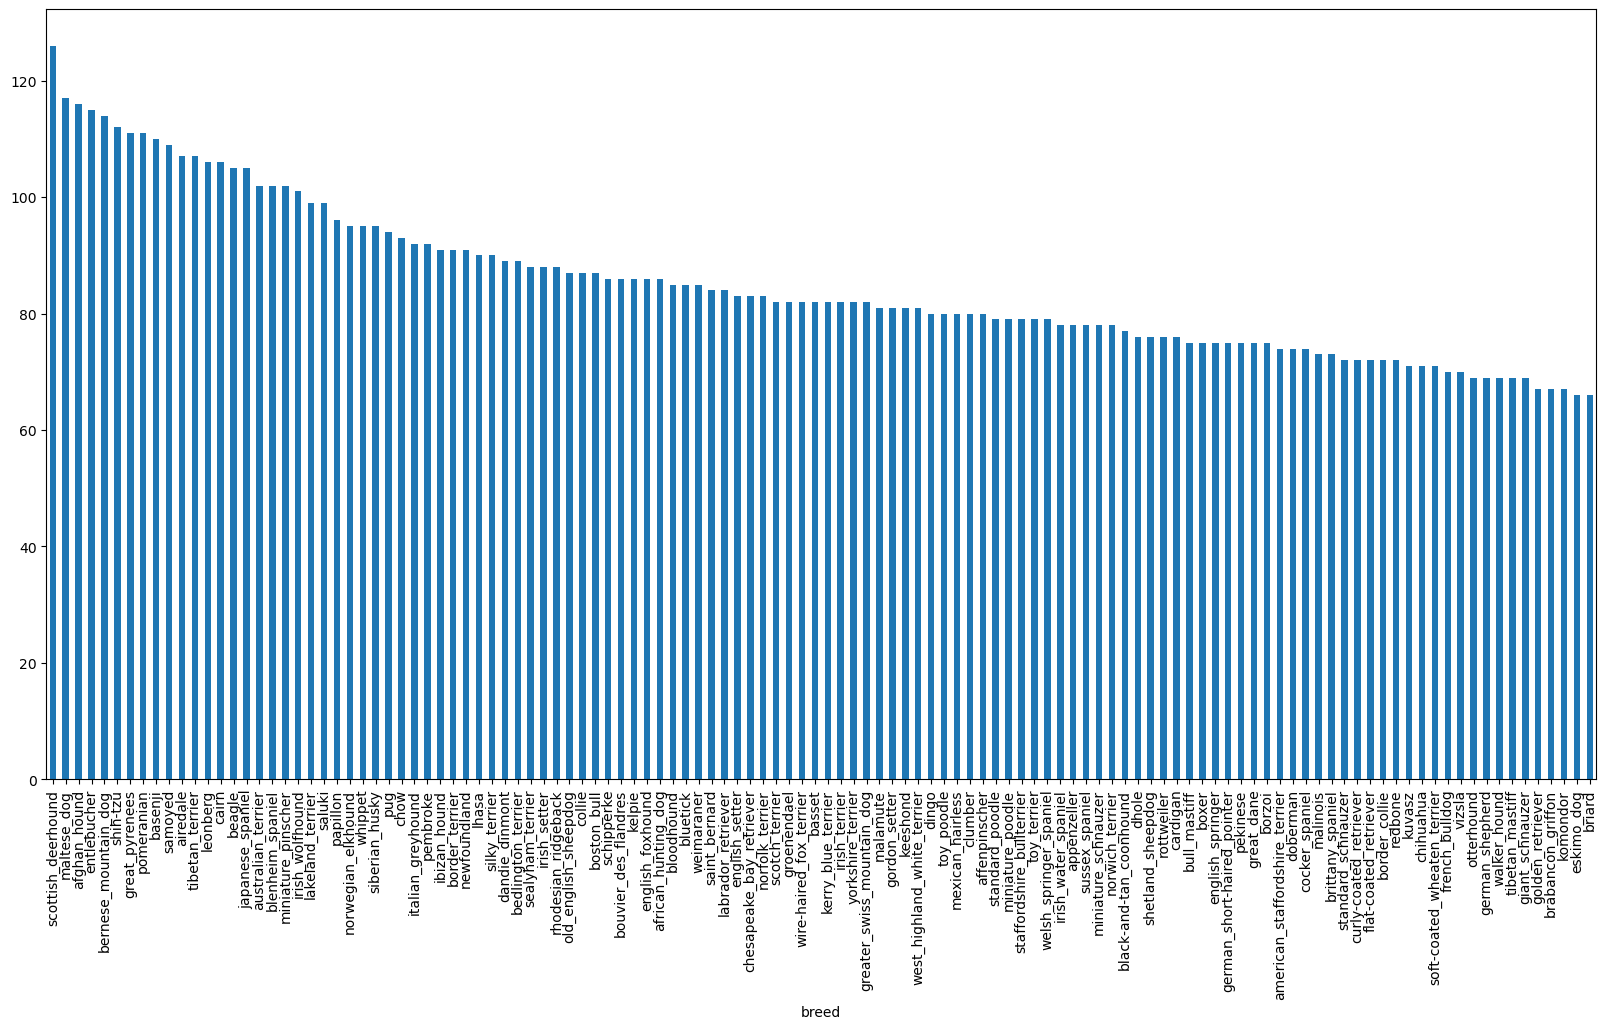

In [363]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [364]:
labels_csv["breed"].value_counts().mean()

85.18333333333334

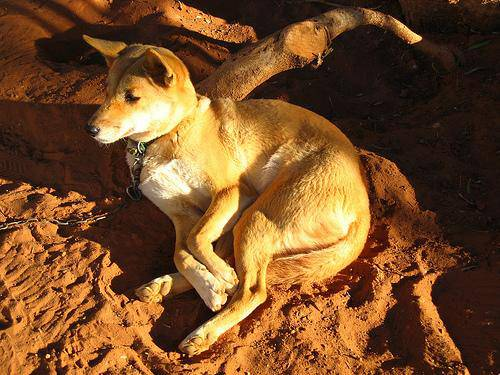

In [365]:
from IPython.display import Image
Image("train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

### Getting images and their labels

In [366]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [367]:
filenames = ["train/" + fname + ".jpg" for fname in labels_csv["id"]]

#Check the first  10
filenames[:10]

['train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'train/001cdf01b096e06d78e9e5112d419397.jpg',
 'train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'train/002a283a315af96eaea0e28e7163b21b.jpg',
 'train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [368]:
#Check no. of filenaems matches no. of actual image files
import os

if len(os.listdir("train/")) == len(filenames):
    print("File names macth actual Qty of files!!! Proceed")
else:
    print("Filenames Do not Match to Actual Qty of Files")


File names macth actual Qty of files!!! Proceed


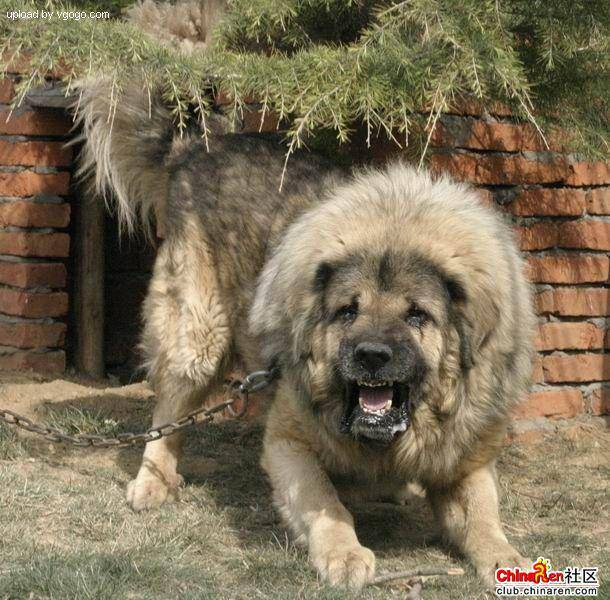

In [369]:
# Check Data format
Image(filenames[9000])

In [370]:
labels_csv["breed"][9000]

'tibetan_mastiff'

In [371]:
import numpy as np 

#convert names into np array's
labels = labels_csv["breed"].to_numpy()
labels = np.array(labels) #does the same thing

labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [372]:
len(labels)

10222

In [373]:
if len(labels) == len(filenames):
    print("Number of labels matches number of filenames!")
else:
    print("No. of Labels does not macth number of filenames")


Number of labels matches number of filenames!


In [374]:
unique_breeds = np.unique(labels)
print("No. of Breeds:",len(unique_breeds))

No. of Breeds: 120


In [375]:
# Turn a single label into an aray of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [376]:
# Turn every label into boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [377]:
len(boolean_labels)

10222

In [378]:
# Example: Turning boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
(array([19], dtype=int64),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our own validation set

In [379]:
# Setup X and y Variables
X = filenames
y = boolean_labels

# Try to minimize time while training a model, so work with less data at first


In [380]:
NUM_IMAGES = 1000

In [381]:
# Split data into two different sets

from sklearn.model_selection import train_test_split

#Split the data

X_Train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],y[:NUM_IMAGES],test_size=0.2,random_state=42)

# Check the shape of data
len(X_Train), len(X_val), len(y_train), len(y_val)


(800, 200, 800, 200)

In [382]:
# Lets have a quick look at data of training

X_Train[:2], y_train[:2]

(['train/00bee065dcec471f26394855c5c2f3de.jpg',
  'train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, Fa

In [383]:
# Lets have a quick look at data of validation

X_val[:2], y_val[:2]

(['train/0ca9280205bd68d201e1d708db3f209d.jpg',
  'train/12405b2e93417d81f5308769c4e184c7.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, Fa

## PreProcessing Images (truning images into tensors)

steps:

1. Take a image from filepath as input.
2. Use Tensorflow to read and save image to variable.
3. Turn image into tensors.
4. Resize image to be a shape of (224,224).
5. Return the modified image.

In [384]:
from matplotlib.pyplot import imread

image = imread(filenames[42])
image.shape

(257, 350, 3)

In [385]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

### Now we have seen ehat image looks like in a tensor, lets make a function to preprocess them

1. Take an image filepath as input
2. Use tensorflow to read the file and save it to a variable
3. Turn our image into ten set_matplotlib_formats
4. Resize Image to 224,224
5. Return the modified image

In [386]:
# Define image size
IMG_SIZE = 224

# Create a function for pre processing images
def process_image(image_path,img_size=IMG_SIZE):
    """
    Takes an image file path and turn the image into a tensor 
    """

    #Read in an image file
    image = tf.io.read_file(image_path)

    #Turn jpeg image into numerical tensor with 3 channels color RGB
    image = tf.image.decode_jpeg(image, channels=3)

    #convert the color channel values from 0 -255 to 0-1 values
    image = tf.image.convert_image_dtype(image, tf.float32)

    #Resize the image to our desired value (224,224)
    image = tf.image.resize(image, size=[IMG_SIZE,IMG_SIZE])

    return image

## Turning our data into batches

Why turn in batches?

All images might not fit into memory so all data cannot go in one go, 
thats why we do about 32 images at a time.

In order to use Tensorflow effectively, we need our data in the from of tensor tuples which look like this : (images, labels)

In [387]:
# create a simple function to retrun a tuple (image, tuple)

def get_image_label(image_path, label):
    """Takes an image file path name and the associated label,
        processes the image and retrun a tuple of (image, label)
    """
    image = process_image(image_path)
    return image,label

#Demo of above
(process_image(X[42]),tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we've got to turn our data into tuples of tensors in the form :

(image,label), let's make a function to turn all our data (X , Y) intp batches

In [396]:
#Define bacth size = 32
BATCH_SIZE = 32

#Create afunction to turn data into batches
def create_data_batches(X,y=None, batch_size = BATCH_SIZE, valid_data = False, test_data = False):
    """
    Create bacthes of data out of image (X) and label (y) Pairs.
    Shuffles the data if its training data but doesn't shuffle if its validation data
    Also accepts test data as input (n labels)
    """

    # If the data is a test dataset, we probably dont have labels
    if test_data:
        print("Creating test data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) #only filepaths (no labels)
        data_batch = data.map(process_image).batch(BATCH_SIZE)
        print("Test data batches Created!!!!!!")
        return data_batch
        
    # If the sata is a valid dataset, we don't need to shuffle it
    elif valid_data:
        print("Creating Validation data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), 
                                                   tf.constant(y)))
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        print("Val data batches Created!!!!!!")
        return data_batch
    
    else:
        print(" Creating training data batches...")
        #Turn file paths and labels into tensors
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                                   tf.constant(y)))

        #Shuffling pathnames and labels before mapping image processor functiopn is faster than shuffling images
        data = data.shuffle(buffer_size=len(X))

        #Create (image, label) tuples (this also turns the image path into a preprocessed image)
        data = data.map(get_image_label)

        # Turn the training  data into batches
        data_batch = data.batch(BATCH_SIZE)
        print("Train data batches Created!!!!!!")
        return data_batch

In [397]:
# Creating training  and validation data batches

train_data = create_data_batches(X_Train,y_train)
val_data = create_data_batches(X_val,y_val,valid_data=True)

 Creating training data batches...
Train data batches Created!!!!!!
Creating Validation data batches...
Val data batches Created!!!!!!


In [398]:
print("Training Data after batching : ",train_data.element_spec)
print("Validation Data after batching : ",val_data.element_spec)

Training Data after batching :  (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))
Validation Data after batching :  (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))


## Visualing Data batches

Our data is now in batches, however these can be a little hard to understand/comprehend, lets visualizethe data

In [399]:
import matplotlib.pyplot as plt 

# Create a functioon for viewing images in a data batch
def show_25_images(images,labels):
    """
    Displays a plot of 25 images and their labels from data batch
    """

    #Setup a figure
    plt.figure(figsize=(12,12))

    #Loop through 25 (for displaying 25 images)
    for i in range(25):
        #Create subplots (5 rows, 5 columns)
        ax = plt. subplot(5,5,i+1)
        #Display image
        plt.imshow(images[i])
        #Add the image label as the title
        plt.title(unique_breeds[labels[i].argmax()])
        #Tuen the grid lines off
        plt.axis("off")

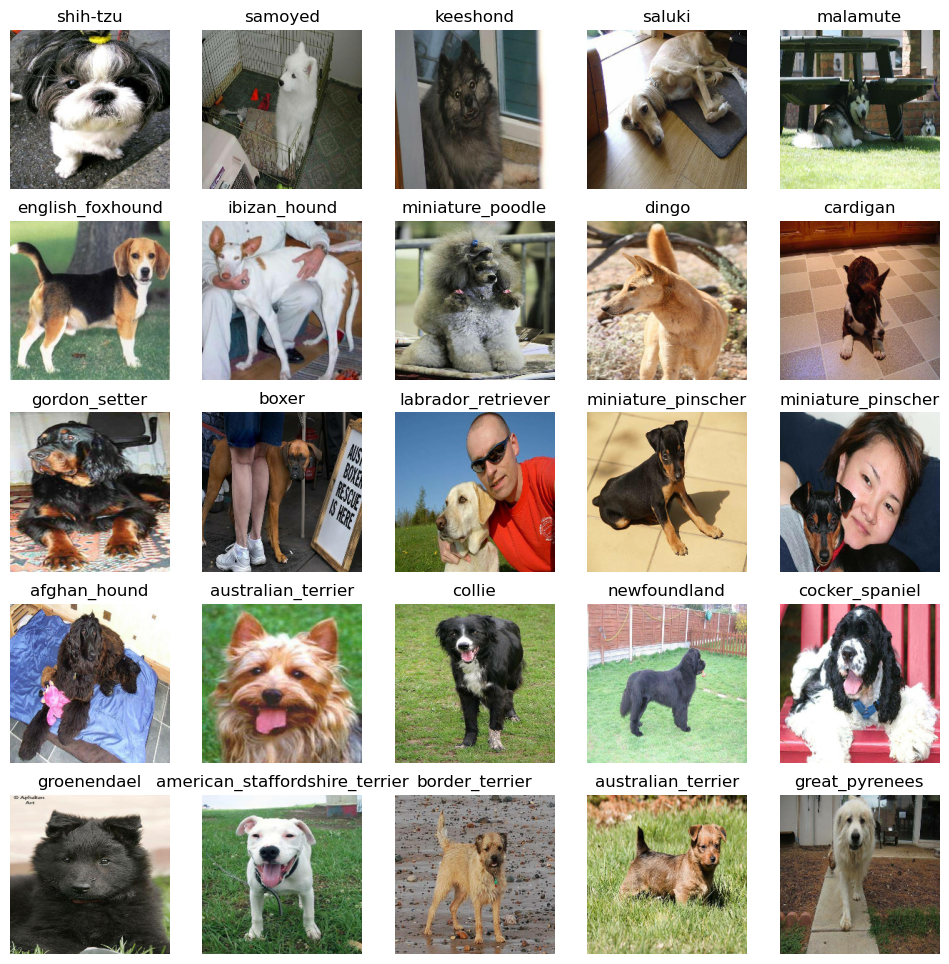

In [400]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images,train_labels)

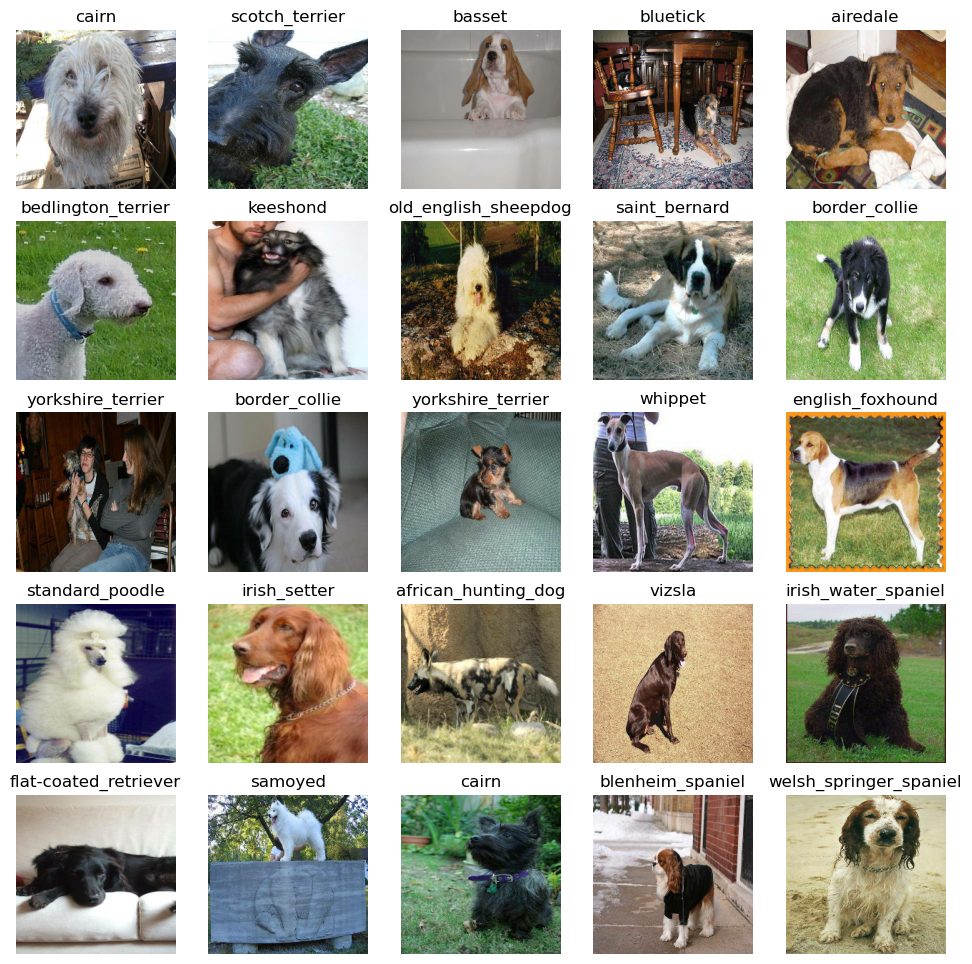

In [401]:
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images,val_labels)

# Building A Model

Before we build a model, there are a few things we need to define:

* Input shape (our images shape in the form of tensors) to our model.
* The output shaep (image labels, in the form of tensors) of our model. 
* The URL of Model we want to use.

In [402]:
IMG_SIZE

224

In [403]:
#Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

#Setup output of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL form tensorflow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [405]:
# Create a function which builds a Keras Model
def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_URL):
    """
    This function builds a Keras Model with given URL, Input and Output shape.
    """
    print("Building model with:",MODEL_URL)

    #Setup the model layers
    model = tf.keras.Sequential([hub.KerasLayer(MODEL_URL), #Layer 1 (Input Layer)
                                 tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                                                       activation="softmax") # Layer 2 (Output Layer)
                                 ])

# Compile the Model
    
    model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=["accuracy"]
    )

#Build the Model
    model.build(INPUT_SHAPE)

    return model

In [406]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_10 (KerasLayer)  (None, 1001)             5432713   
                                                                 
 dense_10 (Dense)            (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating callbacks
Callbacks are helper functions a model can use during training  
to do such things as save its progress, check its progress or stop training early if a model stops improving.

We'll create two callbacks, one for TensorBoard which helps track our models progress   
and another for early stopping which prevents our model from training for too long.
### TensorBoard Callback

1. Load the TensorBoard notebook extension  
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's fit() function.  
3. Visualize our models training logs with the tensorboard magic function (we'll do this after model training).  

In [407]:
# Load TensorBoard notebook Extension
from tensorflow.keras.callbacks import TensorBoard
from tensorboard import notebook

%load_ext tensorboard


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [408]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
    # Create a log directory for storing TensorBoard logs
    logdir = os.path.join("logs",
    #Make it so the logs get tracked whenever we run an experiment
    datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    return tf.keras.callbacks. TensorBoard(logdir)

### Early Stopping CallBacks :   
Early Stopping helps stop our model from overfiting by stoppping training if a certain evaluation metrics stops improving

In [409]:
# Create early stopping callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=3)

## Training a Model (on subset of Data)

Our first model is only going to train on 1000 images, to make sure everything is working

In [410]:
NUM_EPHOCS = 100 #

In [411]:
# Check If we are using GPU

print("GPU", "available Yesssssss!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU available Yesssssss!!!)


Let's create a function which trains a model.  

* Create a model using create_model()  
* Setup a TensorBoard callback using create_tensorboard_callback()  
* Call the fit() function on our model passing it the training data, validation data, number of epochs to train for (NUM_EPOCHS) and the  
* callbacks we'd like to use  
* Return the model  

In [412]:
# Build a function to train

def train_model():
    """
    Trains a given Model and returns the trained version
    """

    #create a model
    model = create_model()

    #Create new Tensorboard session everytime we train a model
    tensorboard = create_tensorboard_callback()

    # Fit the Model to the Data passing it the call backs we created
    model.fit(
        x=train_data,
        epochs = NUM_EPHOCS,
        validation_data=val_data,
        validation_freq=1,
        callbacks=[tensorboard, early_stopping]

    )
    # Return the Fitted Model
    return model

In [413]:
# Fit the Model to Data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 7s 130ms/step - loss: 4.5645 - accuracy: 0.0850 - val_loss: 3.4961 - val_accuracy: 0.2650
Epoch 2/100
25/25 [==============================] - 3s 101ms/step - loss: 1.6028 - accuracy: 0.6938 - val_loss: 2.2226 - val_accuracy: 0.4550
Epoch 3/100
25/25 [==============================] - 3s 101ms/step - loss: 0.5515 - accuracy: 0.9463 - val_loss: 1.7208 - val_accuracy: 0.5400
Epoch 4/100
25/25 [==============================] - 3s 102ms/step - loss: 0.2477 - accuracy: 0.9900 - val_loss: 1.5238 - val_accuracy: 0.5750
Epoch 5/100
25/25 [==============================] - 3s 105ms/step - loss: 0.1415 - accuracy: 0.9987 - val_loss: 1.4416 - val_accuracy: 0.5700
Epoch 6/100
25/25 [==============================] - 3s 102ms/step - loss: 0.0990 - accuracy: 1.0000 - val_loss: 1.3843 - val_accuracy: 0.5950
Epoch 7/100
25/25 [==============================

Question: It looks like our model is overfitting because it's performing   
far better on the training dataset than the validation dataset,  
what are some ways to prevent model overfitting in deep learning neural  networks?   

* Note: Overfitting to begin with is a good thing! It means our model is learning!!!  
- Checking the TensorBoard logs  
The TensorBoard magic function (tensorboard) will access the logs directory we created earlier and visualize its contents.  

In [414]:
%tensorboard --logdir logs #Launch Tensorboard to Evaluate the Models in Runtime or after Training.


Reusing TensorBoard on port 6006 (pid 2880), started 14:49:54 ago. (Use '!kill 2880' to kill it.)

# Making and Evaluating predictions using a trained Model

In [415]:
val_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [416]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 1s 100ms/step


array([[8.8607130e-04, 1.4033328e-05, 6.8411446e-04, ..., 2.2300424e-04,
        6.7214401e-06, 2.7347021e-03],
       [1.2066986e-03, 1.7484916e-04, 6.1140037e-03, ..., 1.0125531e-03,
        7.1374769e-03, 1.7834801e-04],
       [4.0557919e-05, 7.7621888e-05, 6.3318228e-05, ..., 4.1539289e-04,
        5.5133947e-05, 1.6427611e-03],
       ...,
       [2.0095097e-06, 1.1303088e-05, 7.3817100e-05, ..., 6.2874574e-06,
        1.8017003e-05, 5.8042740e-05],
       [2.5953623e-03, 9.9343350e-05, 1.1092427e-04, ..., 1.7630732e-04,
        5.2683128e-05, 8.3509786e-03],
       [3.3064495e-04, 1.6606309e-05, 1.8568226e-03, ..., 2.2434057e-03,
        3.8157851e-03, 3.3307396e-04]], dtype=float32)

In [417]:
predictions.shape

(200, 120)

In [418]:
len(y_val)

200

In [419]:
len(predictions[0])

120

In [420]:
np.sum(predictions[0])

0.9999999

In [421]:
# First prediction
index = 24
print(predictions[index])
print(f"MAX Value (Probability of prediction) : {np.max(predictions[index])}")
print(f"Sum : {np.sum(predictions[index])}")
print(f"Max Index : {np.argmax(predictions[index])}")
print(f"Predicted Label : {unique_breeds[np.argmax(predictions[index])]}")


[2.60172219e-05 4.27058330e-05 4.77594403e-05 4.55931549e-05
 1.86612451e-05 7.18232404e-05 1.67412640e-04 3.56672244e-05
 2.87183124e-04 2.13469411e-05 1.05437248e-05 7.33891560e-04
 2.29877992e-06 6.05035108e-03 6.17322657e-05 6.93844195e-05
 9.63288840e-05 4.07375264e-05 3.56627017e-04 1.00555117e-05
 7.04536387e-06 1.20253144e-05 2.18079076e-05 4.37424887e-06
 5.01337054e-04 9.16059889e-06 2.23466152e-04 2.39281289e-05
 1.41522532e-05 1.60517829e-05 3.05389112e-05 1.55553338e-04
 3.49444747e-02 2.74342194e-04 1.47446735e-05 6.14107776e-05
 6.44458269e-05 1.60730615e-05 9.42036968e-06 3.11106822e-04
 9.13220365e-03 1.87615503e-03 2.08752128e-04 1.42915997e-05
 4.28062231e-05 4.66340771e-06 4.88985497e-05 1.95895209e-05
 2.83208283e-05 3.36671976e-04 2.51172140e-04 2.07269186e-05
 5.47638883e-05 1.65404458e-06 1.43719944e-05 3.36804442e-05
 3.34726926e-03 1.84496865e-04 2.97868362e-04 8.85695918e-05
 9.92110654e-06 3.70989437e-05 1.95820598e-06 2.55303130e-05
 1.81758651e-06 2.724580

In [422]:
unique_breeds[90]

'rhodesian_ridgeback'

Having the the above functionality is great but we want to be able to do it at scale.  
And it would be even better if we could see the image the prediction is being made on!  
Note: Prediction probabilities are also known as confidence levels.  

In [423]:
# Turn prediction probabilities into their respective label (easier to understand) 
def get_pred_label(prediction_probabilities):
    """
    Turns an array of prediction probabilities into a label.
    """
    return unique_breeds[np.argmax(prediction_probabilities)]
    # Get a predicted label based on an array of prediction probablities
pred_label = get_pred_label(predictions[12])
pred_label

'yorkshire_terrier'

In [424]:
val_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

Since the validation data is in batch dataset,   
have to unbatch it to make predictions on validation images  
compare thos predictions to the calidation labels (truth labels)  

In [425]:
# Create a function to unbatch dataset
images_1 = []
labels_1 = []

#loop through unbatche data
for image, label in val_data.unbatch().as_numpy_iterator():
    images_1.append(image)
    labels_1.append(label)

images_1[0], labels_1[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [426]:
get_pred_label(labels_1[0])

'cairn'

In [427]:
def Unbacthify(data):
    """ 
    Takes a bacthed Dataset of (image, label) Tensors and Returns Separate arrays of images and labels.
    """

    images = []
    labels = []

    #Loop through unbatched data
    for image,label in data.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(unique_breeds[np.argmax(label)])
    return images, labels


val_images, val_labels = Unbacthify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [428]:
get_pred_label(val_labels[0])

'affenpinscher'

Make a function to make it more visual

In [429]:
def plot_pred(pred_probab, labels, images, n=1):
    """ 
    View the prediction, ground truth and image for sample n
    """

    pred_prob, true_label, image = pred_probab[n],labels[n],images[n]

    # get the pred label
    pred_label = get_pred_label(pred_prob)

    #plot image and remove ticks
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

    #Change the colour of title depending on prediction is right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"

    #Change plot title to be predicted , probablity of Prediction and truth label
    plt.title("{}{:2.0f}%{}".format(pred_label,np.max(pred_prob)*100,true_label),color=color)


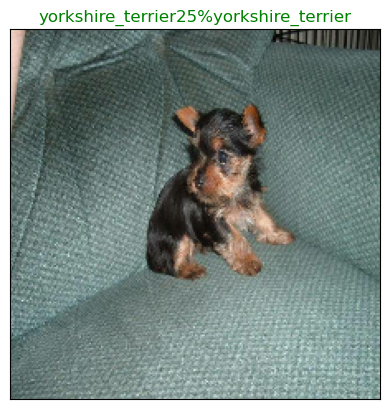

In [430]:
plot_pred(predictions,
        val_labels,
        val_images,
        n=12)

Now we've got one function to visualize our models top prediction, let's make another to view our models top 10 predictions.  
This function will:  
• Take an input of prediction probabilities array and a ground truth array and an integer  
• Find the prediction using get_pred_label()  
• Find the top 10:  
• Prediction probabilities indexes  
• Prediction probabilities values  
• Prediction labels  
Plot the top 10 prediction probability values and labels, coloring the true label green  

In [431]:
def plot_pred_conf(Pred_probab,labels,n=1):
    """ 
    Plus the top 10 highest prediction confidences along eith the truth label for sample n
    """

    pred_prob, true_label = Pred_probab[n], labels[n]

    #get the predicted label
    pred_label = get_pred_label(pred_prob)

    #Find the Top 10 prediction confidence indexes
    top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]

    #Find top 10 pred confidence val_data
    top_10_pred_values = pred_prob[top_10_pred_indexes]

    # Find Labels for Top 10
    top_10_pred_labels = unique_breeds[top_10_pred_indexes]

    #Setup Plot
    top_plot = plt.bar(np.arange(len(top_10_pred_labels)),top_10_pred_values,
                       color="grey")
    
    plt.xticks(np.arange(len(top_10_pred_labels)),
               labels = top_10_pred_labels,
               rotation="vertical")
    
    #Change color if true label
    if np.isin(true_label, top_10_pred_labels):
        top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
    else:
        pass


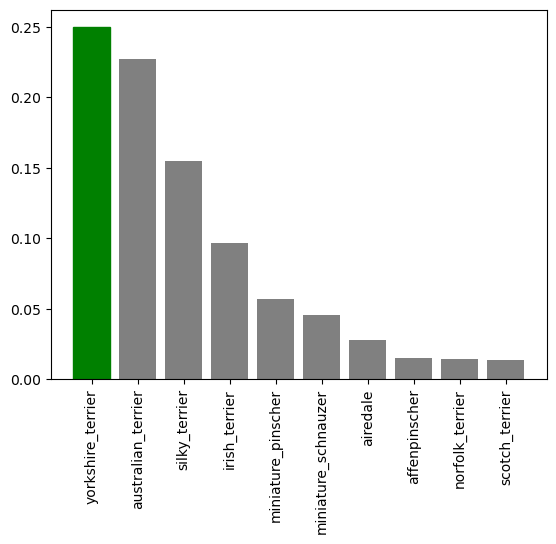

In [432]:
plot_pred_conf(predictions,val_labels,n=12)

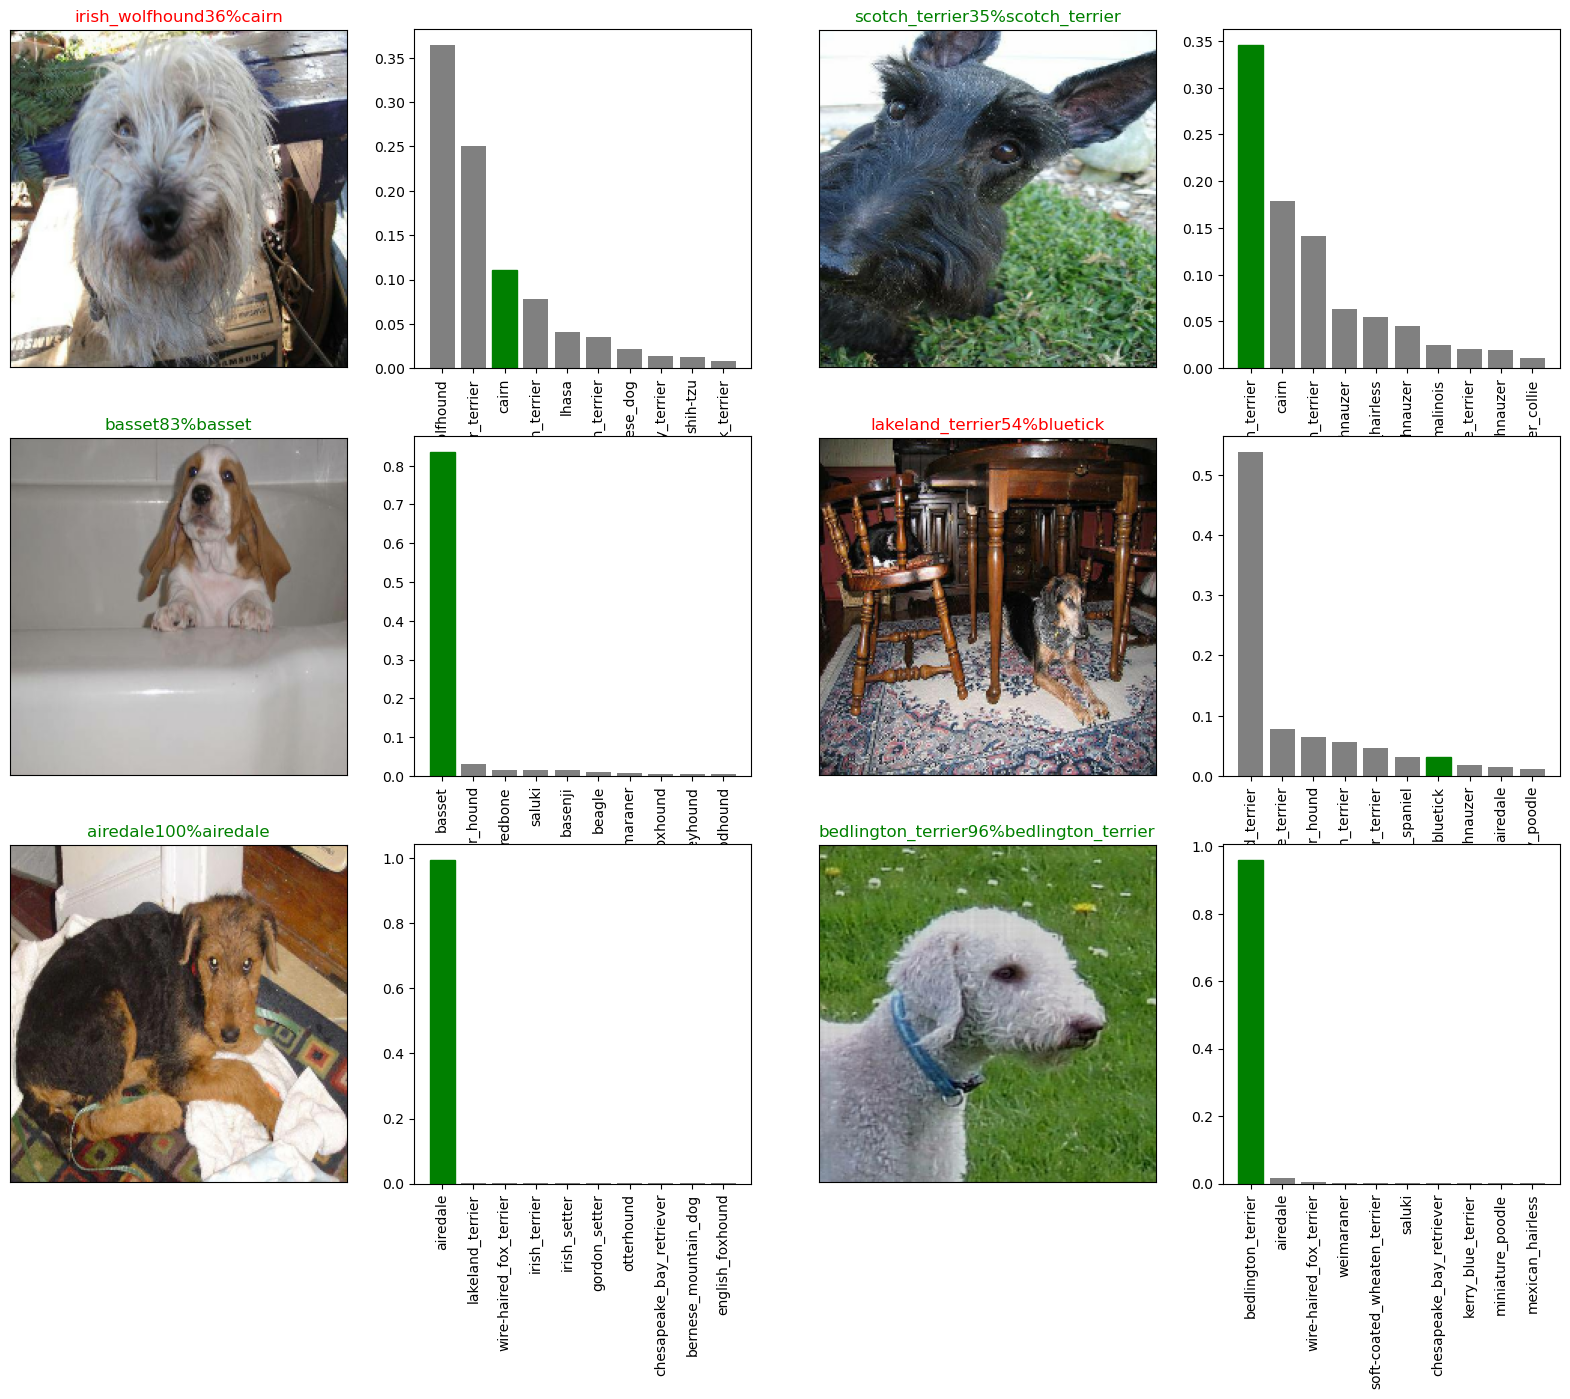

In [433]:
# Lets check out few predictions and their different values

i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows * num_cols
plt.figure(figsize=(10*num_cols,5*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols,2*i+1)
    plot_pred(predictions,val_labels,val_images,n=i+i_multiplier)

    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_pred_conf(predictions,val_labels,n=i+i_multiplier)

    plt.tight_layout
plt.show()

## Saving and Reloading Model

In [446]:
# create a function to save a model
def save_model(model, suffix=None):
    """ 
    Saves a given model in a models directory and appends a duffix (string)
    """

    # Create a model directory pathname with current time
    
    modeldir = os.path.join("models",datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    model_path = modeldir + "-" + suffix + ".h5" # Save model format
    print(f"Saving Model to : {model_path}...")
    model.save(model_path)
    return model_path


In [442]:
#Create a function to load a trained model
def load_model(model_path):
    """ 
    Load a saved model from specified path
    """

    print(f"Loading saved model from {model_path}...")

    model = tf.keras.models.load_model(model_path,
                                       custom_objects={"KerasLayer":hub.KerasLayer})
    
    return model

In [447]:
# Save our Model trained on 100 images

save_model(model,suffix="1000-images-mobilenetv2-Adam")

Saving Model to : models\20240201-132408-1000-images-mobilenetv2-Adam.h5...


'models\\20240201-132408-1000-images-mobilenetv2-Adam.h5'

In [449]:
Loaded_1000_Images_model = load_model(r"D:\COURSES\Udemy\Codes_Practice\Deep_Learning\models\20240201-132408-1000-images-mobilenetv2-Adam.h5")

Loading saved model from D:\COURSES\Udemy\Codes_Practice\Deep_Learning\models\20240201-132408-1000-images-mobilenetv2-Adam.h5...


In [450]:
model.evaluate(val_data)

7/7 [==============================] - 1s 79ms/step - loss: 1.2382 - accuracy: 0.6450


[1.23820161819458, 0.6449999809265137]

In [451]:
Loaded_1000_Images_model.evaluate(val_data)

7/7 [==============================] - 2s 77ms/step - loss: 1.2382 - accuracy: 0.6450


[1.23820161819458, 0.6449999809265137]

## Training a Big DOG model (on Full DATA)

In [455]:
len(X), len(y)

(10222, 10222)

In [454]:
len(X_Train),len(y_train)

(800, 800)

In [456]:
# Create data Batched with Full Data
full_data = create_data_batches(X,y)

 Creating training data batches...
Train data batches Created!!!!!!


In [457]:
full_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [458]:
# Create a model for full model
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [459]:
# Create Full Model CallBacks
full_model_tensorboard = create_tensorboard_callback()

#No Validation set when  traingin on all data so we cant monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=3)

**NOTE :** Running the cell below will take a little while (maybe upto 30 min for the first epoch) because the GPU we're using in the runtime has to load all the images into memory

In [461]:
# Fit the full model to the full data
full_model.fit(x=full_data,
               epochs=NUM_EPHOCS,
               callbacks=[full_model_tensorboard,
               full_model_early_stopping])

Epoch 1/100


320/320 [==============================] - 34s 90ms/step - loss: 1.3264 - accuracy: 0.6701
Epoch 2/100
320/320 [==============================] - 27s 84ms/step - loss: 0.3976 - accuracy: 0.8829
Epoch 3/100
320/320 [==============================] - 26s 81ms/step - loss: 0.2371 - accuracy: 0.9353
Epoch 4/100
320/320 [==============================] - 26s 80ms/step - loss: 0.1508 - accuracy: 0.9654
Epoch 5/100
320/320 [==============================] - 26s 80ms/step - loss: 0.1043 - accuracy: 0.9789
Epoch 6/100
320/320 [==============================] - 26s 80ms/step - loss: 0.0756 - accuracy: 0.9874
Epoch 7/100
320/320 [==============================] - 26s 80ms/step - loss: 0.0576 - accuracy: 0.9909
Epoch 8/100
320/320 [==============================] - 26s 81ms/step - loss: 0.0475 - accuracy: 0.9944
Epoch 9/100
320/320 [==============================] - 26s 81ms/step - loss: 0.0367 - accuracy: 0.9965
Epoch 10/100
320/320 [==============================] - 26s 81ms/step - loss: 0.0297 

In [462]:
save_model(full_model,suffix="full-image-set-mobilenetv2-Adam")

Saving Model to : models\20240201-135041-full-image-set-mobilenetv2-Adam.h5...


'models\\20240201-135041-full-image-set-mobilenetv2-Adam.h5'

In [464]:
loaded_full_model = load_model(r"D:\COURSES\Udemy\Codes_Practice\Deep_Learning\models\20240201-135041-full-image-set-mobilenetv2-Adam.h5")

Loading saved model from D:\COURSES\Udemy\Codes_Practice\Deep_Learning\models\20240201-135041-full-image-set-mobilenetv2-Adam.h5...


## Making predictions on the test data set  
Since Our model has been trained on Images in the form of Tensor bacthes,   
to make predictions on the test data, we'll have to get it into the same format.  

To make predictions on the test data, we'll:  
• Get the test image filenames.  
• Convert the filenames into test data batches using create_date_batches() and setting the test_data parameter to True (since the test data doesn't have labels).  
• Make a predictions array by passing the test batches to the predict() method called on our model.  

In [474]:
# Load test image filenames

test_path = "D:\\COURSES\\Udemy\\Codes_Practice\\Deep_Learning\\test\\"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['D:\\COURSES\\Udemy\\Codes_Practice\\Deep_Learning\\test\\000621fb3cbb32d8935728e48679680e.jpg',
 'D:\\COURSES\\Udemy\\Codes_Practice\\Deep_Learning\\test\\00102ee9d8eb90812350685311fe5890.jpg',
 'D:\\COURSES\\Udemy\\Codes_Practice\\Deep_Learning\\test\\0012a730dfa437f5f3613fb75efcd4ce.jpg',
 'D:\\COURSES\\Udemy\\Codes_Practice\\Deep_Learning\\test\\001510bc8570bbeee98c8d80c8a95ec1.jpg',
 'D:\\COURSES\\Udemy\\Codes_Practice\\Deep_Learning\\test\\001a5f3114548acdefa3d4da05474c2e.jpg',
 'D:\\COURSES\\Udemy\\Codes_Practice\\Deep_Learning\\test\\00225dcd3e4d2410dd53239f95c0352f.jpg',
 'D:\\COURSES\\Udemy\\Codes_Practice\\Deep_Learning\\test\\002c2a3117c2193b4d26400ce431eebd.jpg',
 'D:\\COURSES\\Udemy\\Codes_Practice\\Deep_Learning\\test\\002c58d413a521ae8d1a5daeb35fc803.jpg',
 'D:\\COURSES\\Udemy\\Codes_Practice\\Deep_Learning\\test\\002f80396f1e3db687c5932d7978b196.jpg',
 'D:\\COURSES\\Udemy\\Codes_Practice\\Deep_Learning\\test\\0036c6bcec6031be9e62a257b1c3c442.jpg']

In [475]:
len(test_filenames)

10357

In [476]:
# Create Test Data batches
test_data = create_data_batches(test_filenames,test_data=True)
test_data

Creating test data batches...
Test data batches Created!!!!!!


<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

**NOTE :** Calling predict() on our full model and passing the test data bacth eill take a long time to run.

In [477]:
# Make Predictions on test data using loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

  1/324 [..............................] - ETA: 34s

324/324 [==============================] - 29s 90ms/step


In [478]:
# SAve test predictions (Numpy Array) to CSV
np.savetxt("D:\\COURSES\\Udemy\\Codes_Practice\\Deep_Learning\\test_predictions\\preds_array.csv",test_predictions,delimiter=",")

In [480]:
# Load predictions (Numpy Array) from csv file
test_predictions = np.loadtxt("D:\\COURSES\\Udemy\\Codes_Practice\\Deep_Learning\\test_predictions\\preds_array.csv",delimiter=",")

In [481]:
test_predictions[:10]

array([[7.24620071e-13, 2.36763083e-13, 5.18704025e-16, ...,
        4.28848080e-15, 5.27933045e-11, 1.48668198e-12],
       [1.03656373e-06, 4.56352808e-07, 3.82462986e-08, ...,
        1.24488449e-11, 4.52302302e-08, 6.55314636e-10],
       [2.29659156e-11, 1.87453423e-07, 2.39236381e-10, ...,
        1.49772788e-07, 1.89455071e-12, 1.32354327e-12],
       ...,
       [5.28677435e-10, 1.79529881e-11, 2.15179610e-11, ...,
        5.23023844e-13, 3.95647192e-13, 1.16996491e-11],
       [1.17327740e-12, 7.11523201e-12, 1.60669048e-11, ...,
        2.72170638e-07, 4.56839400e-10, 6.87645947e-12],
       [1.51247559e-09, 9.21298367e-12, 2.65808556e-12, ...,
        1.45797193e-13, 1.91479905e-12, 4.84113372e-08]])

## Preparing test dataset predictions for Kaggle  
Looking at the Kaggle sample submission, we find that it wants our models prediction probaiblity outputs in a DataFrame with  an ID and a column for each different dog breed.  
https://www.kaggle.com/c/dog-breed-identification/overview/ evaluation  
To get the data in this format, we'll:  
* Create a pandas DataFrame with an ID column as well as a column for each dog breed  
* Add data to the ID column by extracting the test image ID's from their filepaths  
* Add data (the prediction probabilites) to each of the dog breed columns.  
* Export the DataFrame as a CSV to submit it to Kaggle.  

In [483]:
# Create a Dataframe with Pandas with empty columns
preds_df = pd.DataFrame(columns=["id"]+list(unique_breeds))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [488]:
# Append test image Id's to prediction Dataframes
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df["id"] = test_ids

In [489]:
preds_df.head()

id affenpinscher afghan_hound  \
0  000621fb3cbb32d8935728e48679680e           NaN          NaN   
1  00102ee9d8eb90812350685311fe5890           NaN          NaN   
2  0012a730dfa437f5f3613fb75efcd4ce           NaN          NaN   
3  001510bc8570bbeee98c8d80c8a95ec1           NaN          NaN   
4  001a5f3114548acdefa3d4da05474c2e           NaN          NaN   

  african_hunting_dog airedale american_staffordshire_terrier appenzeller  \
0                 NaN      NaN                            NaN         NaN   
1                 NaN      NaN                            NaN         NaN   
2                 NaN      NaN                            NaN         NaN   
3                 NaN      NaN                            NaN         NaN   
4                 NaN      NaN                            NaN         NaN   

  australian_terrier basenji basset  ... toy_poodle toy_terrier vizsla  \
0                NaN     NaN    NaN  ...        NaN         NaN    NaN   
1                NaN     NaN    NaN  ...        NaN         NaN    NaN   
2                NaN     NaN    NaN  ...        NaN         NaN    NaN   
3                NaN     NaN    NaN  ...        NaN         NaN    NaN   
4                NaN     NaN    NaN  ...        NaN         NaN    NaN   

  walker_hound weimaraner welsh_springer_spaniel west_highland_white_terrier  \
0          NaN        NaN                    NaN                         NaN   
1          NaN        NaN                    NaN                         NaN   
2          NaN        NaN                    NaN                         NaN   
3          NaN        NaN                    NaN                         NaN   
4          NaN        NaN                    NaN                         NaN   

  whippet wire-haired_fox_terrier yorkshire_terrier  
0     NaN                     NaN               NaN  
1     NaN                     NaN               NaN  
2     NaN                     NaN               NaN  
3     NaN                     NaN               NaN  
4     NaN                     NaN               NaN  

[5 rows x 121 columns]

In [490]:
# Add the prediction probablities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

id  affenpinscher  afghan_hound  \
0  000621fb3cbb32d8935728e48679680e   7.246201e-13  2.367631e-13   
1  00102ee9d8eb90812350685311fe5890   1.036564e-06  4.563528e-07   
2  0012a730dfa437f5f3613fb75efcd4ce   2.296592e-11  1.874534e-07   
3  001510bc8570bbeee98c8d80c8a95ec1   1.461243e-05  4.008960e-06   
4  001a5f3114548acdefa3d4da05474c2e   8.011154e-05  4.904217e-06   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         5.187040e-16  2.324333e-15                    5.497097e-14   
1         3.824630e-08  7.863220e-10                    2.133933e-06   
2         2.392364e-10  4.231123e-12                    2.569573e-12   
3         3.754677e-07  6.399397e-05                    1.689755e-04   
4         2.885088e-09  3.080510e-10                    1.251671e-10   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  2.821252e-13        5.422525e-18  1.042648e-14  6.245870e-15  ...   
1  8.924062e-09        5.737779e-07  2.734853e-07  1.012477e-08  ...   
2  5.532039e-09        7.021892e-12  8.276067e-12  1.912667e-10  ...   
3  6.451568e-07        6.904644e-11  2.604992e-09  2.099532e-08  ...   
4  2.695161e-12        2.782091e-10  1.906967e-09  1.376411e-09  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  1.938184e-14  7.283662e-15  1.317362e-15  1.003975e-16  6.282332e-16   
1  7.108412e-09  1.109207e-06  3.219425e-09  3.069855e-06  4.567348e-08   
2  2.516812e-13  4.486756e-12  1.558798e-08  5.565466e-07  3.579063e-09   
3  6.044197e-07  5.518310e-10  4.989315e-07  3.335077e-09  5.848886e-07   
4  5.683855e-08  1.968178e-11  1.425853e-11  5.062330e-12  3.414980e-11   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            1.448999e-14                 1.197926e-14  4.288481e-15   
1            1.210981e-07                 8.453159e-04  1.244884e-11   
2            9.009975e-09                 3.401546e-13  1.497728e-07   
3            5.576515e-10                 1.212156e-15  3.016819e-02   
4            1.288628e-10                 6.431751e-12  4.210875e-08   

   wire-haired_fox_terrier  yorkshire_terrier  
0             5.279330e-11       1.486682e-12  
1             4.523023e-08       6.553146e-10  
2             1.894551e-12       1.323543e-12  
3             2.381813e-10       1.033266e-07  
4             1.406964e-10       1.259251e-08  

[5 rows x 121 columns]

In [491]:
# Export to csv for submission to Kaggle

preds_df.to_csv("D:\\COURSES\\Udemy\\Codes_Practice\\Deep_Learning\\test_predictions\\Full_model_predictions_submission_1_mobilenetV2.csv",index=False)

## Making predictions on custom images

To make predictions on custom images, we'll:  
• Get the filepaths of our own images.  
• Turn the filepaths into data batches using create_data_batches(). And since our custom images won't have labels, we set the test_data parameter to True.  
• Pass the custom image data batch to our model's predict() method.  
• Convert the prediction output probabilities to predictions labels.  
• Compare the predicted labels to the custom images.  

In [504]:
# Get Custom image file path
custom_path = "D:\\COURSES\\Udemy\\Codes_Practice\\Deep_Learning\\Custom_Images\\"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [505]:
custom_image_paths

['D:\\COURSES\\Udemy\\Codes_Practice\\Deep_Learning\\Custom_Images\\IMG-20231012-WA0001.jpg',
 'D:\\COURSES\\Udemy\\Codes_Practice\\Deep_Learning\\Custom_Images\\IMG-20231012-WA0008.jpg']

In [506]:
# Turn Custom Images into batch datsets

custom_data = create_data_batches(custom_image_paths, test_data=True)
custom_data

Creating test data batches...
Test data batches Created!!!!!!


<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [507]:
# Make predictions on custom data
custom_preds = loaded_full_model.predict(custom_data)
custom_preds

1/1 [==============================] - 1s 977ms/step


array([[1.92461425e-09, 6.16642097e-08, 6.80423611e-08, 6.45928155e-09,
        1.77648793e-08, 8.13761199e-06, 2.09252816e-03, 2.61853052e-06,
        1.14330407e-02, 9.44393337e-01, 1.99615577e-08, 1.34483058e-09,
        1.64448393e-05, 1.48358339e-07, 7.29760068e-05, 3.77820470e-07,
        2.33750484e-06, 1.97708432e-05, 1.33514207e-12, 2.31188423e-07,
        4.37356609e-11, 7.62677310e-10, 6.19060302e-06, 4.25583906e-08,
        1.02857844e-11, 5.14623707e-06, 2.78454948e-08, 1.70937328e-05,
        2.02627649e-04, 8.34234379e-05, 4.40055885e-08, 4.72138527e-06,
        5.85704640e-07, 3.15277360e-09, 3.37990551e-12, 1.74698596e-06,
        5.98691305e-11, 3.71479255e-04, 6.31686916e-08, 1.39489614e-10,
        3.40168668e-07, 9.62103400e-07, 4.83374151e-06, 1.83916956e-04,
        8.62739489e-06, 3.77761751e-07, 3.69665031e-05, 1.02016738e-05,
        2.88120031e-11, 2.32572547e-05, 1.55006137e-06, 2.43189006e-05,
        1.74392495e-04, 2.58766340e-06, 1.89411464e-09, 1.062991

In [508]:
custom_preds.shape

(2, 120)

In [509]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['beagle', 'entlebucher']

In [510]:
# Get custom images unbatchify
custom_images = []

# Loop through unbacthed data
for image in custom_data.unbatch().as_numpy_iterator():
    custom_images.append(image)

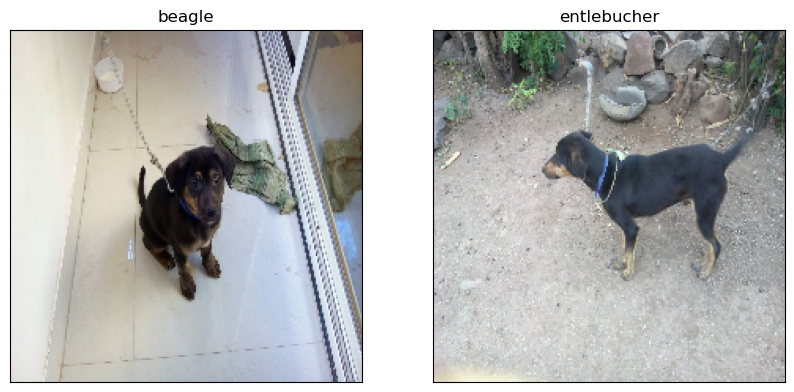

In [511]:
plt.figure(figsize=(10,10))
for i, image in enumerate(custom_images):
    plt.subplot(1,len(custom_image_paths),i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(custom_pred_labels[i])
    plt.imshow(image)